# Author: Fatema Tuz Zohora

GRIP - The Sparks Foundation

Data Science & Business Analytics Intern

Task 7: Stock Market Prediction using Numerical and Textual Analysis

The task is to analyze and predict - SENSEX (S&P BSE SENSEX)

Tools: Numpy Array, Pandas, Matplotlib, Scikit Learn

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #declarative statistical visualization library

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 6.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=78392a2f4866439519de9af9353b0a08f916e365441d745ab7d6fd297fe9bd89
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


# since our Textual Analysis dataset containing news from Times of India News Headlines is only till 30th June 2020.
# So we predict the stock price and closing price for 30th June 2020.

In [4]:
import yfinance as yf
BSEdata = yf.download('^BSESN', start='2015-01-01', end='2020-06-30')
BSEunseendata = yf.download('^BSESN', start='2020-06-30', end='2020-07-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Knowing about data

In [18]:
BSEdata.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200
2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200


In [24]:
BSEdata.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)
BSEdata.reset_index(inplace=True)
BSEdata.rename(columns={'Date': 'date'}, inplace = True)
BSEdata['date'] = pd.to_datetime(BSEdata['date'], format = '%Y%m%d')

In [25]:
BSEdata.tail()

,index,date,open,high,low,close,adjclose,volume
1340,1340,2020-06-23,35015.730469,35482.160156,34843.691406,35430.429688,35430.429688,25200
1341,1341,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600
1342,1342,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101562,34842.101562,24600
1343,1343,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800
1344,1344,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300


In [6]:
BSEdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1345 entries, 2015-01-02 to 2020-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1345 non-null   float64
 1   High       1345 non-null   float64
 2   Low        1345 non-null   float64
 3   Close      1345 non-null   float64
 4   Adj Close  1345 non-null   float64
 5   Volume     1345 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.6 KB


In [7]:
BSEdata.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1.345000e+03
mean,32032.534800,32180.642524,31806.772791,31984.237075,31984.237075,2.506319e+05
std,4954.395482,4960.357794,4930.071573,4942.241822,4942.241822,2.031427e+06
min,23060.390625,23142.960938,22494.609375,22951.830078,22951.830078,2.500000e+03
25%,27721.720703,27902.390625,27563.839844,27697.509766,27697.509766,1.000000e+04
50%,31694.150391,31809.699219,31471.410156,31646.460938,31646.460938,1.270000e+04
75%,36106.359375,36253.851562,35863.289062,36033.730469,36033.730469,1.830000e+04
max,42263.000000,42273.871094,41850.289062,41952.628906,41952.628906,3.181510e+07


In [ ]:
BSEdata.isnull().sum()

In [9]:
BSEunseendata

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [27]:
BSEunseendata.rename(columns={'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Adj Close': 'adjclose', 'Volume': 'volume'}, inplace = True)
BSEunseendata.reset_index(inplace=True)
BSEunseendata.rename(columns={'date': 'date'}, inplace = True)
BSEunseendata['date'] = pd.to_datetime(BSEunseendata['date'], format = '%Y%m%d')


In [28]:
BSEunseendata

,index,date,open,high,low,close,adjclose,volume
0,0,2020-06-30,35168.300781,35233.910156,34812.800781,34915.800781,34915.800781,18500


In [29]:
BSEunseendata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     1 non-null      int64         
 1   date      1 non-null      datetime64[ns]
 2   open      1 non-null      float64       
 3   high      1 non-null      float64       
 4   low       1 non-null      float64       
 5   close     1 non-null      float64       
 6   adjclose  1 non-null      float64       
 7   volume    1 non-null      int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 192.0 bytes


# Close Price history

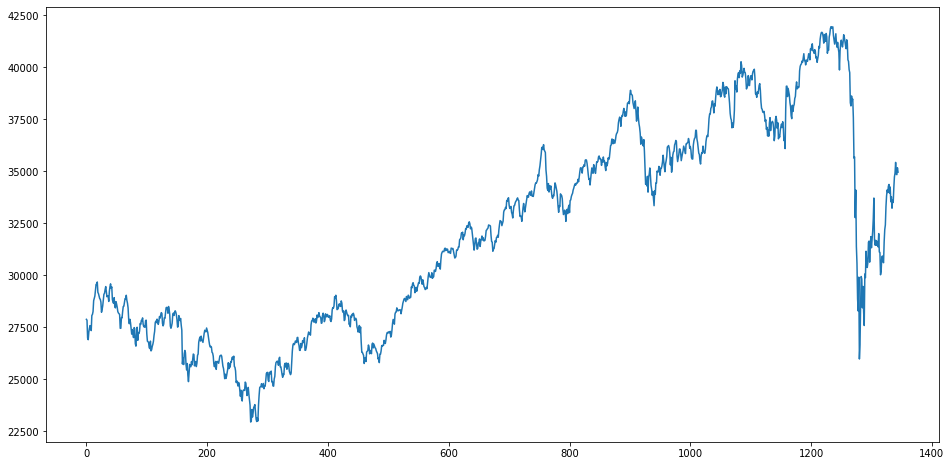

In [84]:
plt.figure(figsize=(16,8))
plt.plot(BSEdata["close"])


# actual price

In [32]:
#(high+low+close)/3)
BSEunseendata_price = round((BSEunseendata['high'] + BSEunseendata['low'] + BSEunseendata['close'])/ 3, 2)
BSEunseendata_price 

0    34987.5
dtype: float64

In [33]:
# Rolling window analysis of time series

def stock_weekmoving_avg(wks, df):
  dateclose = pd.DataFrame({'date': df['date'], 'close':df['close']})
  dateclose.set_index('date', inplace=True)
  num = wks * 5  #BSE is open for 5 days / week
  dateclose['movingavg'] = dateclose['close'].rolling(window=num).mean().shift()
  return dateclose.dropna()

# 4 week moving average of closing price of BSE index

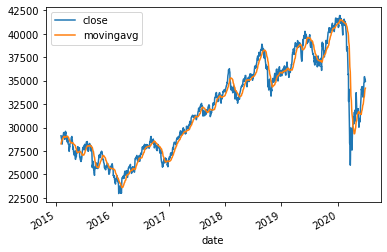

In [35]:
stock_weekmoving_avg(4, BSEdata).plot()

#  Partial Autocorrelation Plot

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


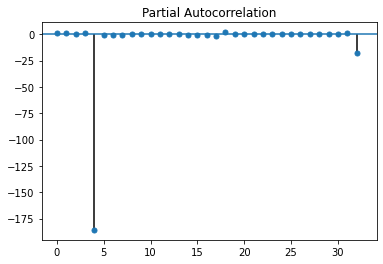

In [38]:
fourweek_altdata = stock_weekmoving_avg(4, BSEdata)
fourweek_altdata.reset_index(inplace=True)
fourweek_altdata.rename(columns={list(fourweek_altdata)[0]:'date'}, inplace=True)

alt.Chart(fourweek_altdata).mark_point().encode(x='date', y='movingavg')

plot= fourweek_altdata.filter(['date', 'movingavg'], axis=1) 
plot.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(fourweek_altdata['date']))) 
del plot['date']
sm.graphics.tsa.plot_pacf(plot.values.squeeze())
plt.show()

> partial autocorrelations at lag values 4 and 32 which represents regions which is not seen in the above plot

# 16 week moving average of closing price of BSE index

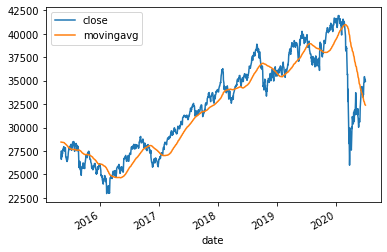

In [42]:
stock_weekmoving_avg(16, BSEdata).plot()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


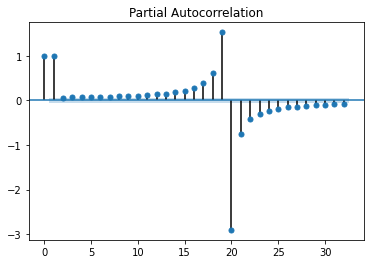

In [51]:
sixteenweek_altdata = stock_weekmoving_avg(16, BSEdata)
sixteenweek_altdata.reset_index(inplace=True)

sixteenweek_altdata.rename(columns={list(sixteenweek_altdata)[0]:'date'}, inplace=True)

alt.Chart(sixteenweek_altdata).mark_point().encode(x='date', y='movingavg')

plotsixteenweek = sixteenweek_altdata.filter(['date', 'movingavg'], axis=1)
plotsixteenweek.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(sixteenweek_altdata['date']))) 
del plotsixteenweek['date']
sm.graphics.tsa.plot_pacf(plotsixteenweek.values.squeeze())
plt.show()

>partial autocorrelations at lag values 0, 1, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28.
Where 0, 1, 19 represents a perfect positive correlation and 20 represents a perfect negative correlation.


#  52 week moving average of closing price of BSE index

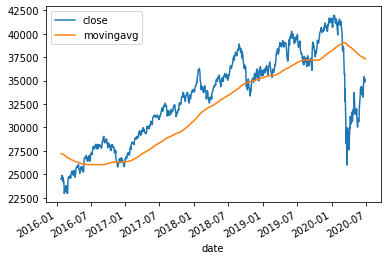

In [52]:
stock_weekmoving_avg(52, BSEdata).plot()

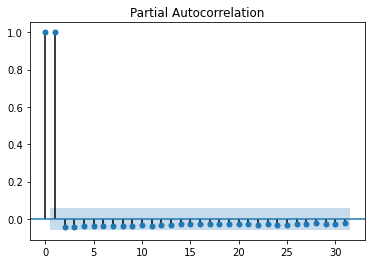

In [54]:
fiftytwoweek_altdata = stock_weekmoving_avg(52, BSEdata)
fiftytwoweek_altdata.reset_index(inplace=True)

fiftytwoweek_altdata.rename(columns={list(fiftytwoweek_altdata)[0]:'date'}, inplace=True)
alt.Chart(fiftytwoweek_altdata).mark_point().encode( x='date', y='movingavg')

fiftytwoweekplot = fiftytwoweek_altdata.filter(['date', 'movingavg'], axis=1) 
fiftytwoweekplot.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(fiftytwoweek_altdata['date']))) 
del fiftytwoweekplot['date']
sm.graphics.tsa.plot_pacf(fiftytwoweekplot.values.squeeze())
plt.show()

> partial autocorrelations at lag values 0, 1 represents a perfect positive correlation.

# Creating a rolling window of  50 of the BSE index

In [55]:
def rolling_windows(days, df):
  data = df.filter(['date','open','high','low','close'], axis=1)
  data.set_index('date', inplace=True)
  rollingwindows = data.rolling(window=days).mean().shift()
  return rollingwindows.dropna()

In [57]:
rolling_windows(50, BSEdata).head()

,open,high,low,close
date,,,,
2015-03-18,28721.847383,28863.956836,28502.767422,28670.602461
2015-03-19,28746.759180,28881.346836,28523.317422,28685.286836
2015-03-20,28763.295000,28899.631836,28535.814414,28697.833828
2015-03-23,28778.719180,28915.340430,28561.266406,28723.306211
2015-03-24,28805.396367,28942.011250,28589.022031,28748.970195


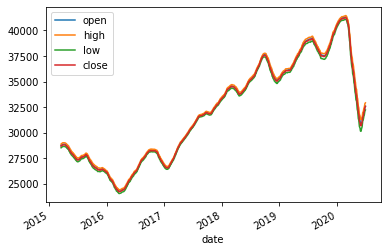

In [59]:
rolling_windows(50, BSEdata).plot()

# Creating the dummy time series:

Volume shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [60]:
def boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1)
  data.set_index('date', inplace=True)
  data['percentchg'] = (data[col].pct_change()) * 100  #percentage change compare to previous volume using pct_change() function
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(col, axis = 1, inplace = True)
  return data.dropna()

In [73]:
boolean_shock(10, BSEdata, 'volume')

,percentchg,shock
date,,
2015-01-05,24.324324,1
2015-01-06,53.260870,1
2015-01-07,-13.475177,0
2015-01-08,-32.786885,0
2015-01-09,35.365854,1
...,...,...
2020-06-23,0.398406,0
2020-06-24,5.555556,0
2020-06-25,-7.518797,0


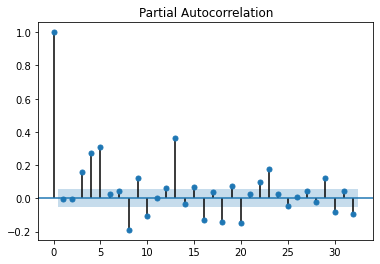

In [74]:
volpercentchg_altdata = boolean_shock(10, BSEdata, 'volume')
volpercentchg_altdata.reset_index(inplace=True)
volpercentchg_altdata.rename(columns={list(volpercentchg_altdata)[0]:'date'}, inplace=True)

alt.Chart(volpercentchg_altdata).mark_point().encode( x='date',y='percentchg')

plotvolpercentchg = volpercentchg_altdata.filter(['date', 'percentchg'], axis=1) 
plotvolpercentchg.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(volpercentchg_altdata['date']))) 
del plotvolpercentchg['date']
sm.graphics.tsa.plot_pacf(plotvolpercentchg.values.squeeze())
plt.show()

## Pricing shock without volume shock


In [66]:
def price_boolean_shock(percent, df):
  df['date'] = pd.to_datetime(df['date'])
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data['priceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['priceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  return data

In [71]:
price_boolean_shock(50, BSEdata)

,priceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


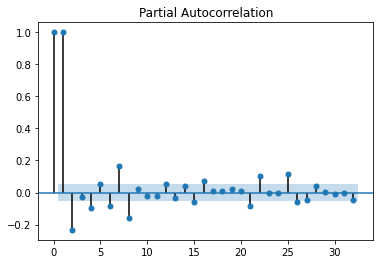

In [72]:
pricepercentchg_altdata = price_boolean_shock(10, BSEdata)
pricepercentchg_altdata.reset_index(inplace=True)
pricepercentchg_altdata.rename(columns={list(pricepercentchg_altdata)[0]:'date'}, inplace=True)

alt.Chart(pricepercentchg_altdata).mark_point().encode(
    x='date',
    y='priceavg'
)
pricepercentchg_plot = pricepercentchg_altdata.filter(['date', 'priceavg'], axis=1)
pricepercentchg_plot.index = pd.Index(sm.tsa.datetools.dates_from_range('2015', length=len(pricepercentchg_altdata['date']))) 
del pricepercentchg_plot['date']
sm.graphics.tsa.plot_pacf(pricepercentchg_plot.values.squeeze())
plt.show()

partial autocorrelations at lag values 0, 1, 2, 4, 6, 7, 8, 15, 16, 21, 22, 25, 26. And lag values 0, 1 represents a perfect positive correlation.

# ## Creating the reverse dummy time series:

Price shocks : we will be creating a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()

In [75]:
def reverse_boolean_shock(percent, df, col):
  data = df.filter(['date', col], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['percentchg'] = (data[col].pct_change()) * 100
  data['shock'] = data['percentchg'].apply(lambda x: 1 if x > percent else 0)
  data.drop(col, axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [77]:
reverse_boolean_shock(3, BSEdata, 'close')

,percentchg,shock
date,,
2015-01-02,0.163708,0
2015-01-05,3.167617,1
2015-01-06,0.292249,0
2015-01-07,-1.341501,0
2015-01-08,-0.668903,0
...,...,...
2020-06-22,-1.465151,0
2020-06-23,1.610168,0
2020-06-24,0.077145,0


Pricing shock without volume shock : Now we will be creating a time series for pricing shock without volume shock based on whether price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock). This will be reverse of pct_change()



In [78]:
def price_reverse_boolean_shock(percent, df):
  data = df.filter(['date', 'high', 'low','close'], axis=1) #df.copy()
  data.set_index('date', inplace=True)
  data = data.reindex(index=data.index[::-1])
  data['reversepriceavg'] = (data['high'] + data['low'] + data['close']) / 3
  data['shock'] = (data['reversepriceavg'].pct_change()) * 100
  data['shock'] = data['shock'].apply(lambda x: 1 if x >= percent else 0)
  data.drop(['high', 'low', 'close'], axis = 1, inplace = True)
  data = data.reindex(index=data.index[::-1])
  return data.dropna()

In [80]:
price_reverse_boolean_shock(3, BSEdata)

,reversepriceavg,shock
date,,
2015-01-02,27781.543620,0
2015-01-05,27897.886719,0
2015-01-06,27207.817057,0
2015-01-07,26912.179688,0
2015-01-08,27231.020182,0
...,...,...
2020-06-23,35252.093750,0
2020-06-24,35123.486979,0
2020-06-25,34807.830729,0


# Textual Analysis of news from Times of India News Headlines


In [106]:
news  = pd.read_csv('/content/drive/MyDrive/india-news-headlines.csv')

In [107]:
news.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [108]:
news.shape

(3297172, 3)

In [109]:
news['publish_date'] = pd.to_datetime(news['publish_date'], format = '%Y%m%d')
news.head()

,publish_date,headline_category,headline_text
0,2001-01-01,sports.wwe,win over cena satisfying but defeating underta...
1,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
3,2001-01-02,unknown,America's unwanted heading for India?
4,2001-01-02,unknown,For bigwigs; it is destination Goa


In [110]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 75.5+ MB


In [111]:
news['headline_category'].value_counts().count()

1016

In [112]:
news['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [113]:
news['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
delhi-ncr                       7
ballot-talk                     7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

In [115]:
news['headline_text'].value_counts()

Sunny Leone HOT photos                                  98
Watch top news in one-minute                            90
Official Site                                           89
Football: Italian Serie A table                         88
Football: Spanish La Liga table                         86
                                                        ..
Sherlyn's the new water baby!                            1
6 Haryana girls in world schools soccer championship     1
I was shocked: Rakshitha                                 1
Advani promises Delhi statehood Bill                     1
4 years on; locks still on new school building           1
Name: headline_text, Length: 3082589, dtype: int64

In [114]:
news['headline_text'].value_counts().count()

3082589

In [117]:
#finding duplicate values
news.duplicated(keep=False).sum()

41638

In [118]:
#sorting the dataset to delete the duplicates.The sorted dataset index values are also changed
cols = list(news.columns)
news.sort_values(by=cols, inplace=True, ignore_index=True)

In [119]:
news[news.duplicated(keep=False)][:10]

,publish_date,headline_category,headline_text
4,2001-01-02,unknown,America's unwanted heading for India?
5,2001-01-02,unknown,America's unwanted heading for India?
6,2001-01-02,unknown,America's unwanted heading for India?
7,2001-01-02,unknown,America's unwanted heading for India?
10,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
11,2001-01-02,unknown,BBC's reality TV will focus on AIIMS
12,2001-01-02,unknown,BJP jumps into rail track conversion issue
13,2001-01-02,unknown,BJP jumps into rail track conversion issue
21,2001-01-02,unknown,Dilute the power of transfers; says Riberio
22,2001-01-02,unknown,Dilute the power of transfers; says Riberio


In [120]:
#dropping the duplicates only keeping the last value of dublicates
news.drop_duplicates(keep='last', inplace=True, ignore_index=True)
news.duplicated().sum()

0

In [121]:
from textblob import TextBlob

unique_dates = news['publish_date'].value_counts().index.tolist()

#concatenating all the headline_text column values of same date in publish_date column
new = []
for x in unique_dates:
  df = news.loc[news['publish_date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)

In [122]:
#creating a new dataset
newsdf = pd.DataFrame({'publish_date': unique_dates, 'headline_text' : new})
newsdf.head()

,publish_date,headline_text
0,2018-07-31,Harley Davidson plans smaller bike with eye on...
1,2018-12-31,Court extends detention for Nissan ex-chair Gh...
2,2018-12-30,expect to nearly treble sales in india in 2019...
3,2014-12-31,Exclusive! BMW i8 India launch in February 201...
4,2017-12-31,53k casual jobs lost in Jan-Mar;overall employ...


In [123]:
#sorting the dataset based on dates
newsdf.sort_values(by='publish_date', inplace=True, ignore_index=True)
newsdf.head()

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...
2,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...
3,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...
4,2001-01-05,Nepal won't allow anti-India activities: Envoy...


In [124]:
newsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   publish_date   7080 non-null   datetime64[ns]
 1   headline_text  7080 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 110.8+ KB


We  are calculating the sentiment using TextBlob. 

>Based on the polarity, we determine whether it is a positive text or negative or neutral. For TextBlog, if the polarity is more than 0, it is considered positive, if it is less than 0 then it is considered negative and if it ia=s equal to 0 is considered neutral. 

>Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information. 

In [125]:
polarity = []
subjectivity = []
for idx, row in newsdf.iterrows():
  polarity.append(TextBlob(row['headline_text']).sentiment[0])
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])

In [126]:
# Addingn the polatity and subjectivity columns in our newsdf
newsdf['polarity'] = polarity
newsdf['subjectivity'] = subjectivity
newsdf.head()

,publish_date,headline_text,polarity,subjectivity
0,2001-01-01,win over cena satisfying but defeating underta...,0.433333,0.633333
1,2001-01-02,Raju Chacha. A noisy effort to spruce up Comme...,0.193519,0.293056
2,2001-01-03,'Devdas': Jinxed?. 10-year-old girl missing. 3...,0.088462,0.407692
3,2001-01-04,Car dealers caught in Bihar sales tax ruling. ...,0.091426,0.481895
4,2001-01-05,Nepal won't allow anti-India activities: Envoy...,0.257415,0.465542


In [127]:
#renameing the publish_date to date so it will help us during joining this dataset with bse_data dataset
newsdf.rename(columns={'publish_date': 'date'}, inplace = True)
#selecting required columns
newsdf = newsdf.filter(['date', 'polarity', 'subjectivity'], axis=1)
newsdf.shape

(7080, 3)

In [128]:
BSEdata.shape

(1345, 8)

In [130]:
# marging the BSE data and news data together
bse_data = pd.merge(BSEdata, newsdf, how='left', on=['date'])
bse_data.head()

,index,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


In [136]:
bse_data.drop('index', inplace=True, axis=1)
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity
0,2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400,0.055586,0.455251
1,2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200,0.100081,0.433132
2,2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100,0.055802,0.386579
3,2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200,0.034707,0.386916
4,2015-01-08,27178.769531,27316.410156,27101.939453,27274.710938,27274.710938,8200,0.060173,0.408416


In [137]:
bse_data.shape

(1345, 9)

# Preparing the dataset for machine learning

>adding new row for 30th June 2020 (price to be predicted of this day) to main dataset to get average values of all the columns for this day. We need average for independent variable.

>This row will be used as prediction of unseen data for tomorrow. Then tally it with actual data from unseenbse_data dataset for 30th June 2020 actual values.

In [138]:
bse_data.loc[len(bse_data)] = ['2020-06-30', bse_data['open'].mean(), bse_data['high'].mean(), bse_data['low'].mean(),bse_data['close'].mean(), bse_data['adjclose'].mean(), bse_data['volume'].median(), newsdf['polarity'].mean(), newsdf['subjectivity'].mean() ]

In [146]:
bse_data["month"] = BSEdata['date'].dt.month
bse_data["day"] = BSEdata['date'].dt.day
bse_data["dayofweek"] = BSEdata['date'].dt.dayofweek
bse_data["week"] = BSEdata['date'].dt.week
bse_data['movingavg4weeks'] = round(BSEdata['close'].rolling(window=(4*5), min_periods = 1).mean().shift(),2)
bse_data['movingavg16weeks'] = round(BSEdata['close'].rolling(window=(16*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 4 weeks 
bse_data['movingavg28weeks'] = round(BSEdata['close'].rolling(window=(28*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 16 weeks
bse_data['movingavg40weeks'] = round(BSEdata['close'].rolling(window=(40*5), min_periods = 1).mean().shift(),2) #add 12 weeks to 28 weeks
bse_data['movingavg52weeks'] = round(BSEdata['close'].rolling(window=(52*5), min_periods = 1).mean().shift(),2)  #add 12 weeks to 40 weeks
bse_data['window10days'] = round(BSEdata['close'].rolling(window = 10, min_periods = 1).mean().shift(),2)  
bse_data['window50days'] = round(BSEdata['close'].rolling(window = 50, min_periods = 1).mean().shift(),2)
bse_data['volumeshock'] = round(boolean_shock(10, BSEdata, 'volume').reset_index()['shock'], 2)
bse_data['closeshock2'] = round(reverse_boolean_shock(2, BSEdata, 'close').reset_index()['shock'], 2)
bse_data['closeshock5'] = round(reverse_boolean_shock(5, BSEdata, 'close').reset_index()['shock'],2)
bse_data['closeshock10'] = round(reverse_boolean_shock(10, BSEdata, 'close').reset_index()['shock'], 2)
bse_data['priceshock'] = round(price_boolean_shock(10, BSEdata).reset_index()['shock'], 2)
bse_data['reversebooleanshock2'] = round(reverse_boolean_shock(2, BSEdata, 'close').reset_index()['shock'], 2)
bse_data['reversebooleanshock5'] = round(reverse_boolean_shock(5, BSEdata, 'close').reset_index()['shock'], 2)
bse_data['pricereverseshock2'] = round(price_reverse_boolean_shock(2, BSEdata).reset_index()['shock'], 2)
bse_data['polarity'] = round(bse_data['polarity'] , 2)
bse_data['subjectivity'] = round(bse_data['subjectivity'] , 2)
bse_data['price'] = round((BSEdata['high'] + BSEdata['low'] + BSEdata['close']) / 3 , 2)
bse_data['close'] = round(BSEdata['close'] , 2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [148]:
bse_data.head()

,date,open,high,low,close,adjclose,volume,polarity,subjectivity,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,price
0,2015-01-02 00:00:00,27521.279297,27937.470703,27519.259766,27887.90,27887.900391,7400.0,0.06,0.46,1.0,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27781.54
1,2015-01-05 00:00:00,27978.429688,28064.490234,27786.849609,27842.32,27842.320312,9200.0,0.10,0.43,1.0,5.0,0.0,2.0,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,27897.89
2,2015-01-06 00:00:00,27694.230469,27698.929688,26937.060547,26987.46,26987.460938,14100.0,0.06,0.39,1.0,6.0,1.0,2.0,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27207.82
3,2015-01-07 00:00:00,26983.429688,27051.599609,26776.119141,26908.82,26908.820312,12200.0,0.03,0.39,1.0,7.0,2.0,2.0,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26912.18
4,2015-01-08 00:00:00,27178.769531,27316.410156,27101.939453,27274.71,27274.710938,8200.0,0.06,0.41,1.0,8.0,3.0,2.0,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27231.02


In [149]:
bse_data.isnull().sum().sum()

34

In [150]:
#fillinf the null columns
bse_data.fillna(method = 'bfill', inplace = True)
bse_data.fillna(method = 'ffill', inplace = True)
bse_data.isnull().sum().sum()

0

In [151]:
#selecting specific columns
bse_data = bse_data.filter(['month', 'day', 'dayofweek', 'week',
       'movingavg4weeks', 'movingavg16weeks', 'movingavg28weeks',
       'movingavg40weeks', 'movingavg52weeks', 'window10days', 'window50days',
       'volumeshock', 'closeshock2', 'closeshock5', 'closeshock10',
       'priceshock', 'reversebooleanshock2', 'reversebooleanshock5',
       'pricereverseshock2', 'polarity', 'subjectivity', 'price', 'close'], axis=1)
bse_data.head()

,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1.0,2.0,4.0,1.0,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.46,27781.54,27887.90
1,1.0,5.0,0.0,2.0,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.10,0.43,27897.89,27842.32
2,1.0,6.0,1.0,2.0,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.39,27207.82,26987.46
3,1.0,7.0,2.0,2.0,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.39,26912.18,26908.82
4,1.0,8.0,3.0,2.0,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.41,27231.02,27274.71


In [152]:
#separating the predicted date row from main dataset after getting all the calculated average values
main_bsedata = bse_data.iloc[:1345,:].reset_index()  
newtestunseen_bsedata = bse_data.iloc[1345:,:].reset_index()  

In [154]:
main_bsedata.shape

(1345, 24)

In [157]:
newtestunseen_bsedata.shape

(1, 24)

In [156]:
main_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,0,1.0,2.0,4.0,1.0,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.46,27781.54,27887.90
1,1,1.0,5.0,0.0,2.0,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,27887.90,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.10,0.43,27897.89,27842.32
2,2,1.0,6.0,1.0,2.0,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,27865.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.39,27207.82,26987.46
3,3,1.0,7.0,2.0,2.0,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,27572.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.39,26912.18,26908.82
4,4,1.0,8.0,3.0,2.0,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,27406.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.41,27231.02,27274.71


In [158]:
newtestunseen_bsedata.head()

,index,month,day,dayofweek,week,movingavg4weeks,movingavg16weeks,movingavg28weeks,movingavg40weeks,movingavg52weeks,window10days,window50days,volumeshock,closeshock2,closeshock5,closeshock10,priceshock,reversebooleanshock2,reversebooleanshock5,pricereverseshock2,polarity,subjectivity,price,close
0,1345,6.0,29.0,0.0,27.0,34195.3,32390.89,36136.56,36963.62,37313.42,34450.58,32556.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.4,34885.31,34961.52


# Training the model


In [159]:
X = main_bsedata.drop(['price','close'], axis = 1)
y = main_bsedata[['price','close']]
X_new_testunseen = newtestunseen_bsedata.drop(['price','close'], axis = 1)
y_new_testunseen_ans = newtestunseen_bsedata[['price','close']]

In [163]:
X.shape, y.shape, X_new_testunseen.shape, y_new_testunseen_ans.shape

((1345, 22), (1345, 2), (1, 22), (1, 2))

In [164]:
split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)


for train_index, test_index in split.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [165]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1076, 22), (1076, 2), (269, 22), (269, 2))

predicting two columns using Chained Multioutput Regression:

>Chained Multioutput Regression is appropriate option as the stock price ((high+low+close)/3) and closing price are interdependent.

In [166]:
rfg = RandomForestRegressor(random_state = 42, n_estimators = 500, criterion='mse', max_depth = 30, min_samples_leaf=2, min_samples_split=5, n_jobs=1)

In [167]:
chainedmodel = RegressorChain(rfg)
chainedmodel.fit(X_train, y_train)

RegressorChain(base_estimator=RandomForestRegressor(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=30,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=500, n_jobs=1,
                                                   

In [168]:
prediction = chainedmodel.predict(X_test)
roundprediction = []
for x in range(len(prediction)):
  roundprediction.append([round(prediction[x][0], 2),round(prediction[x][1], 2) ])


In [170]:
r2_score(y_test, roundprediction) 

0.9946097756135737

#evaluating the performance 

>used average of high, low, close, volume to calculate price ((high+low+close)/3) and close value

In [172]:
print('MAE')
print(mean_absolute_error(y_test, roundprediction), end='\n')

print('MSE')
print(mean_squared_error(y_test, roundprediction), end='\n')

print('RMSE')
print(np.sqrt(mean_squared_error(y_test, roundprediction)))

MAE
256.60849442379185
MSE
130640.03084070643
RMSE
361.44160087171264


In [176]:
pred_new_testunseen = chainedmodel.predict(X_new_testunseen)
pred_new_testunseen


array([[35059.66675286, 34955.75235022]])

In [177]:
[(round(pred_new_testunseen[0][0], 2)),(round(pred_new_testunseen[0][1], 2))]

[35059.67, 34955.75]

In [179]:
y_new_testunseen_ans

,price,close
0,34885.31,34961.52


The actual price ((high+low+close)/3) i.e the average of high, low, close of BSE index on day 30th June 2020 was 34987.5, and closing price was 34915.8


So as seen above the model has done a very good prediction

# Thank You